In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
#%mathinline

In [2]:
kvec = np.logspace(-5,np.log10(10),50)
#kvec = np.linspace(1e-5,34,50)
print(kvec[-1])
test = Class()
h = 0.67
test_dict = {"gauge":"sync",
             "h":h, "P_k_max_1/Mpc":10,
             "output":"nCl,vTk,dTk,mTk",#,vCTk",
             'z_max_pk':1.089163e+03,
             #"z_pk":"1000.0,0.0",
             'k_output_values':str(kvec).strip('[]')}
test.set(test_dict)
test.compute()
tf = test.get_transfer()#z=20)

print(tf['k (h/Mpc)'][-1]*h)

10.0
11.581587959857258


Text(0, 0.5, 'z')

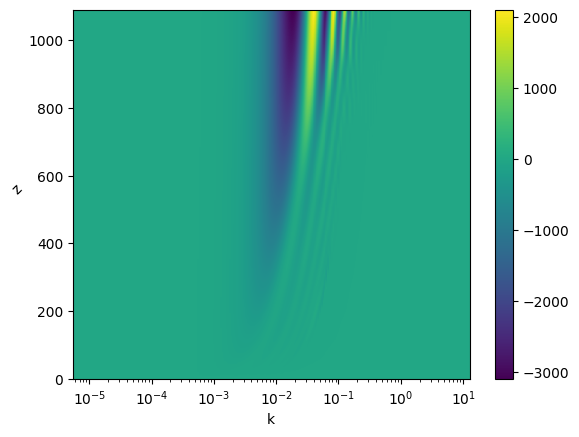

In [3]:
z_max = 1.089163e+03
kvec = tf['k (h/Mpc)'] * h
zsteps = 1000
zvec = np.linspace(0,z_max,zsteps)
z_len = len(zvec)
k_len = len(kvec)
#print(zvec)
X = np.zeros([z_len,k_len])
k_len = len(tf['k (h/Mpc)'])

for z_index,z in enumerate(zvec):
    tfz = test.get_transfer(z)["d_g"] # you can set the index to different species to get different figures like cdm, b, m and g
    a = 1/(z+1)
    for k in range(k_len):
        X[z_index][k] = tfz[k] / a

#print(X)

#X = np.ones([z_len,k_len])
c = plt.pcolormesh(kvec,zvec,X)
#plt.xlim([1e-1,20])
plt.colorbar(c)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("z",rotation=45)